In [23]:
import warnings
# 경고 무시하기
warnings.filterwarnings("ignore", category=FutureWarning)
from torch.utils.data import DataLoader, Dataset

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from scipy import stats

import tensorflow as tf 
from keras.models import Model, Sequential
from keras.layers import Input, Dense


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [24]:
train_df = pd.read_csv("./files/Q1_train.csv")
test_df = pd.read_csv("./files/Q1_train.csv")

In [25]:
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

In [26]:
encoder = LabelEncoder()
train_df_copy['ru_id_encoder'] = encoder.fit_transform(train_df_copy['ru_id'])
test_df_copy['ru_id_encoder'] = encoder.fit_transform(test_df_copy['ru_id'])

In [27]:
train_df_copy["datetime"] = train_df_copy["datetime"].apply(pd.to_datetime)

train_df_copy["year"] = train_df_copy["datetime"].dt.year
train_df_copy["month"] = train_df_copy["datetime"].dt.month
train_df_copy["day"] = train_df_copy["datetime"].dt.day
train_df_copy["hour"] = train_df_copy["datetime"].dt.hour
train_df_copy["minute"] = train_df_copy["datetime"].dt.minute

test_df_copy["datetime"] = test_df_copy["datetime"].apply(pd.to_datetime)

test_df_copy["year"] = test_df_copy["datetime"].dt.year
test_df_copy["month"] = test_df_copy["datetime"].dt.month
test_df_copy["day"] = test_df_copy["datetime"].dt.day
test_df_copy["hour"] = test_df_copy["datetime"].dt.hour
test_df_copy["minute"] = test_df_copy["datetime"].dt.minute

In [28]:
train_df_copy.drop(['datetime','ru_id'], axis=1, inplace=True)
test_df_copy.drop(['datetime','ru_id'], axis=1, inplace=True)

In [29]:
Y = train_df_copy['uenomax']
X = train_df_copy.drop(['uenomax'], axis=1)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
xbg_reg = xgb.XGBRegressor().fit(X_train_scaled, y_train)

In [33]:
xbg_reg.get_booster().get_score(importance_type='gain')

{'f0': 4.530686378479004,
 'f1': 10.534912109375,
 'f2': 966.511474609375,
 'f3': 7576.99365234375,
 'f4': 11.614285469055176,
 'f5': 10.725407600402832,
 'f6': 6.34027624130249,
 'f7': 59.8082275390625,
 'f8': 652.1264038085938,
 'f9': 1240.0567626953125,
 'f10': 10.354159355163574,
 'f11': 11.473248481750488,
 'f12': 5.321862697601318,
 'f13': 5.870736598968506,
 'f15': 5.50809383392334,
 'f16': 10.034222602844238,
 'f17': 11.265565872192383,
 'f18': 6.831484794616699,
 'f19': 93.55195617675781,
 'f20': 88.79511260986328,
 'f21': 493.8810119628906,
 'f22': 73.0097885131836,
 'f23': 12.665119171142578,
 'f24': 18.932479858398438,
 'f25': 23.7508602142334,
 'f26': 8.353877067565918,
 'f27': 18.765926361083984,
 'f28': 17.868331909179688,
 'f29': 9.270963668823242,
 'f31': 531.49169921875,
 'f32': 10.794720649719238,
 'f33': 9.741554260253906,
 'f34': 11.472620964050293,
 'f35': 941.369384765625,
 'f36': 28.767499923706055,
 'f38': 24.972225189208984,
 'f39': 8.1865816116333,
 'f40': 19

In [34]:
f_importance = xbg_reg.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

<Axes: >

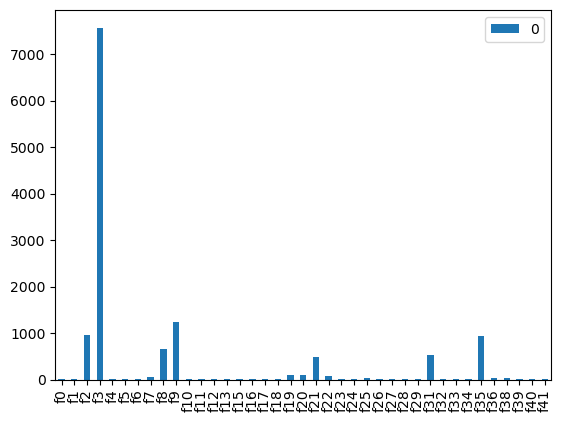

In [35]:
importance_df.plot.bar()

In [36]:
feature_index_to_name = {f'f{i}': col_name for i, col_name in enumerate(X_train.columns)}

# 피처 중요도 값을 딕셔너리 형태로 변환하여 출력
feature_importance_dict = {feature_index_to_name[feature]: importance for feature, importance in f_importance.items()}
print(feature_importance_dict)

{'scgfail': 4.530686378479004, 'scgfailratio': 10.534912109375, 'erabaddatt': 966.511474609375, 'erabaddsucc': 7576.99365234375, 'endcaddatt': 11.614285469055176, 'endcaddsucc': 10.725407600402832, 'endcmodbymenbatt': 6.34027624130249, 'endcmodbymenbsucc': 59.8082275390625, 'endcmodbysgnbatt': 652.1264038085938, 'endcmodbysgnbsucc': 1240.0567626953125, 'connestabatt': 10.354159355163574, 'connestabsucc': 11.473248481750488, 'redirectiontolte_coverageout': 5.321862697601318, 'redirectiontolte_epsfallback': 5.870736598968506, 'handoveratt': 5.50809383392334, 'handoversucc': 10.034222602844238, 'reestabatt': 11.265565872192383, 'reestabsucc': 6.831484794616699, 'rlculbyte': 93.55195617675781, 'rlcdlbyte': 88.79511260986328, 'totprbulavg': 493.8810119628906, 'totprbdlavg': 73.0097885131836, 'dlreceivedriavg': 12.665119171142578, 'dltransmittedmcsavg': 18.932479858398438, 'airmaculbyte': 23.7508602142334, 'airmacdlbyte': 8.353877067565918, 'bler_ul': 18.765926361083984, 'bler_dl': 17.868331

In [37]:
significant_features = {feature: importance for feature, importance in feature_importance_dict.items() if importance >= 89}
print(significant_features)

{'erabaddatt': 966.511474609375, 'erabaddsucc': 7576.99365234375, 'endcmodbysgnbatt': 652.1264038085938, 'endcmodbysgnbsucc': 1240.0567626953125, 'rlculbyte': 93.55195617675781, 'totprbulavg': 493.8810119628906, 'nummsg3': 531.49169921875, 'endcrelbymenb': 941.369384765625}


In [38]:
correlation = train_df['erabaddatt'].corr(train_df['erabaddsucc'])
print("Correlation between erabaddatt and erabaddsucc:", correlation)

Correlation between erabaddatt and erabaddsucc: 0.9999950736894876


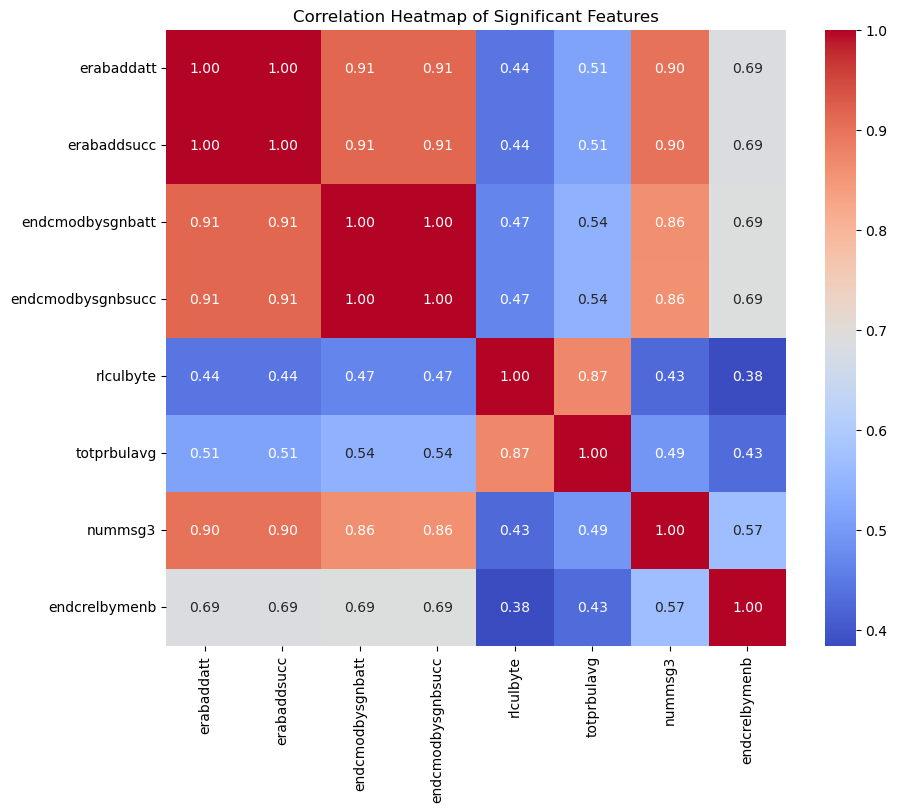

In [39]:
significant_features_df = pd.DataFrame.from_dict(significant_features, orient='index', columns=['importance'])

# significant_features_df에 해당하는 칼럼들만 선택하여 데이터프레임 생성
selected_features_df = train_df[list(significant_features.keys())]

# 상관계수 행렬 계산
correlation_matrix = selected_features_df.corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Significant Features")
plt.show()

In [40]:
significant_features_df

,importance
erabaddatt,966.511475
erabaddsucc,7576.993652
endcmodbysgnbatt,652.126404
endcmodbysgnbsucc,1240.056763
rlculbyte,93.551956
totprbulavg,493.881012
nummsg3,531.491699
endcrelbymenb,941.369385


# 특정 피처들로 ARIMA 적용

In [43]:
# 필요한 칼럼들만 선택하여 train_df와 test_df 업데이트
selected_columns = ['datetime', 'ru_id', 'erabaddsucc', 'endcmodbysgnbatt',
                    'rlculbyte', 'rlcdlbyte','totprbulavg', 'endcrelbymenb', 'uenomax']
train_df = train_df[selected_columns]
test_df = test_df[selected_columns]


# 업데이트된 train_df와 test_df 확인
print(train_df.shape)
train_df.head()


(137445, 9)


,datetime,ru_id,erabaddsucc,endcmodbysgnbatt,rlculbyte,rlcdlbyte,totprbulavg,endcrelbymenb,uenomax
0,2023-05-19 00:00:00,BaseStationG,12,0,0.0,0.0,0.0,0,1
1,2023-05-19 00:00:00,BaseStationE,28,34,1242.0,57165.0,0.2,4,5
2,2023-05-19 00:00:00,BaseStationF,27,15,4527.0,93792.0,0.6,2,6
3,2023-05-19 00:00:00,BaseStationI,1,0,10.0,26.0,0.0,0,1
4,2023-05-19 00:00:00,BaseStationD,29,18,492.0,85493.0,0.1,28,4


In [50]:
basestation_id = train_df[train_df.ru_id == 'BaseStationA'][['ru_id', 'datetime', 'uenomax']]
basestation_id.head()

,ru_id,datetime,uenomax
6,BaseStationA,2023-05-19 00:00:00,1
14,BaseStationA,2023-05-19 00:05:00,2
22,BaseStationA,2023-05-19 00:10:00,3
30,BaseStationA,2023-05-19 00:15:00,2
38,BaseStationA,2023-05-19 00:20:00,2


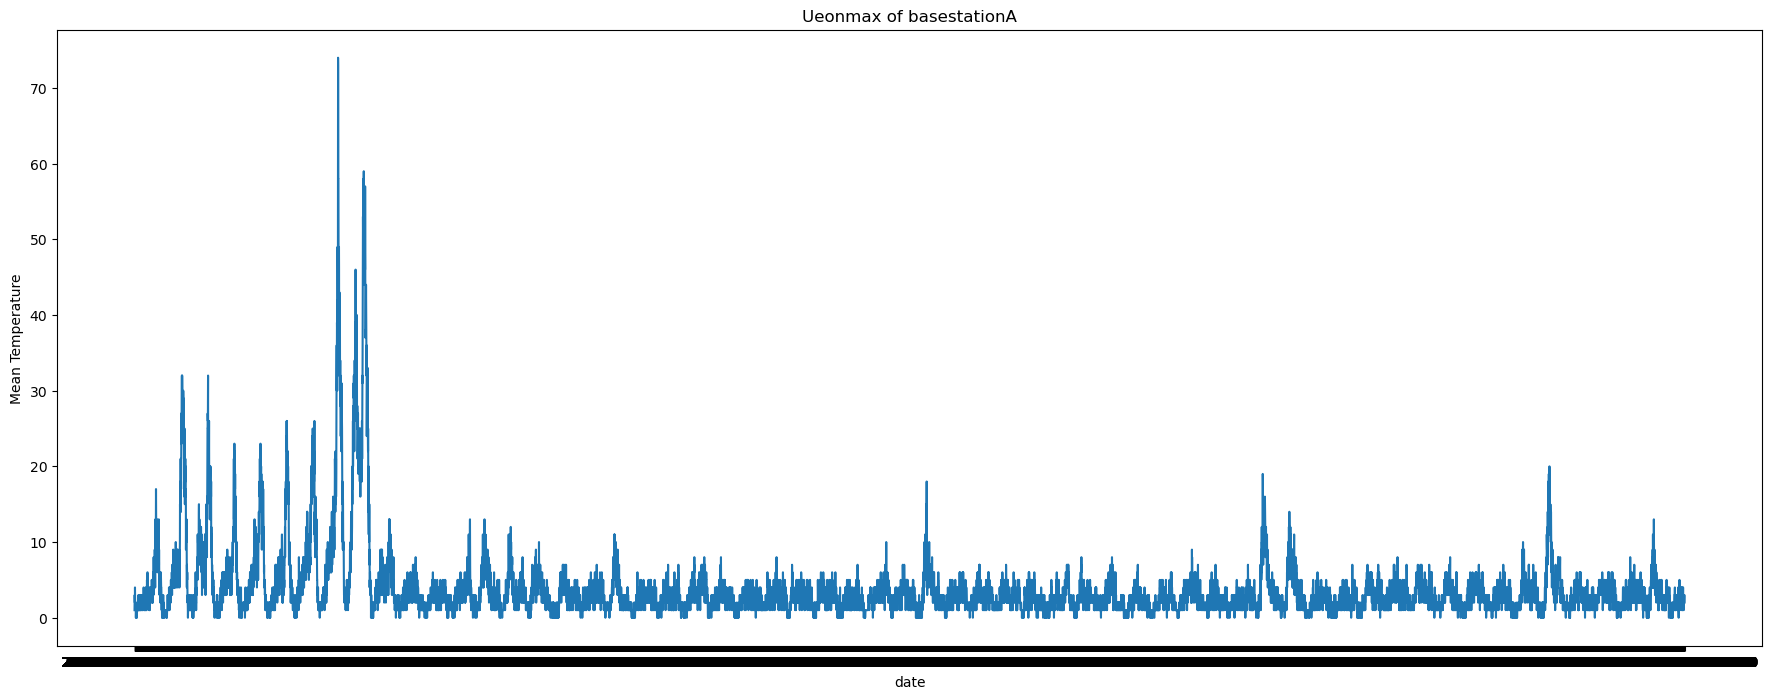

In [52]:
plt.figure(figsize = (22,8))
plt.plot(basestation_id.datetime, basestation_id.uenomax)
plt.title("Ueonmax of basestationA")
plt.xlabel('date')
plt.ylabel("Mean Temperature")
plt.show()

In [56]:
timeSeries = basestation_id.loc[:,["datetime", "uenomax"]]
timeSeries.index = timeSeries.datetime
ts = timeSeries.drop("datetime" ,axis = 1)

In [57]:
ts

,uenomax
datetime,
2023-05-19 00:00:00,1
2023-05-19 00:05:00,2
2023-05-19 00:10:00,3
2023-05-19 00:15:00,2
2023-05-19 00:20:00,2
...,...
2023-07-17 15:30:00,3
2023-07-17 15:35:00,3
2023-07-17 15:40:00,3


<Figure size 640x480 with 0 Axes>

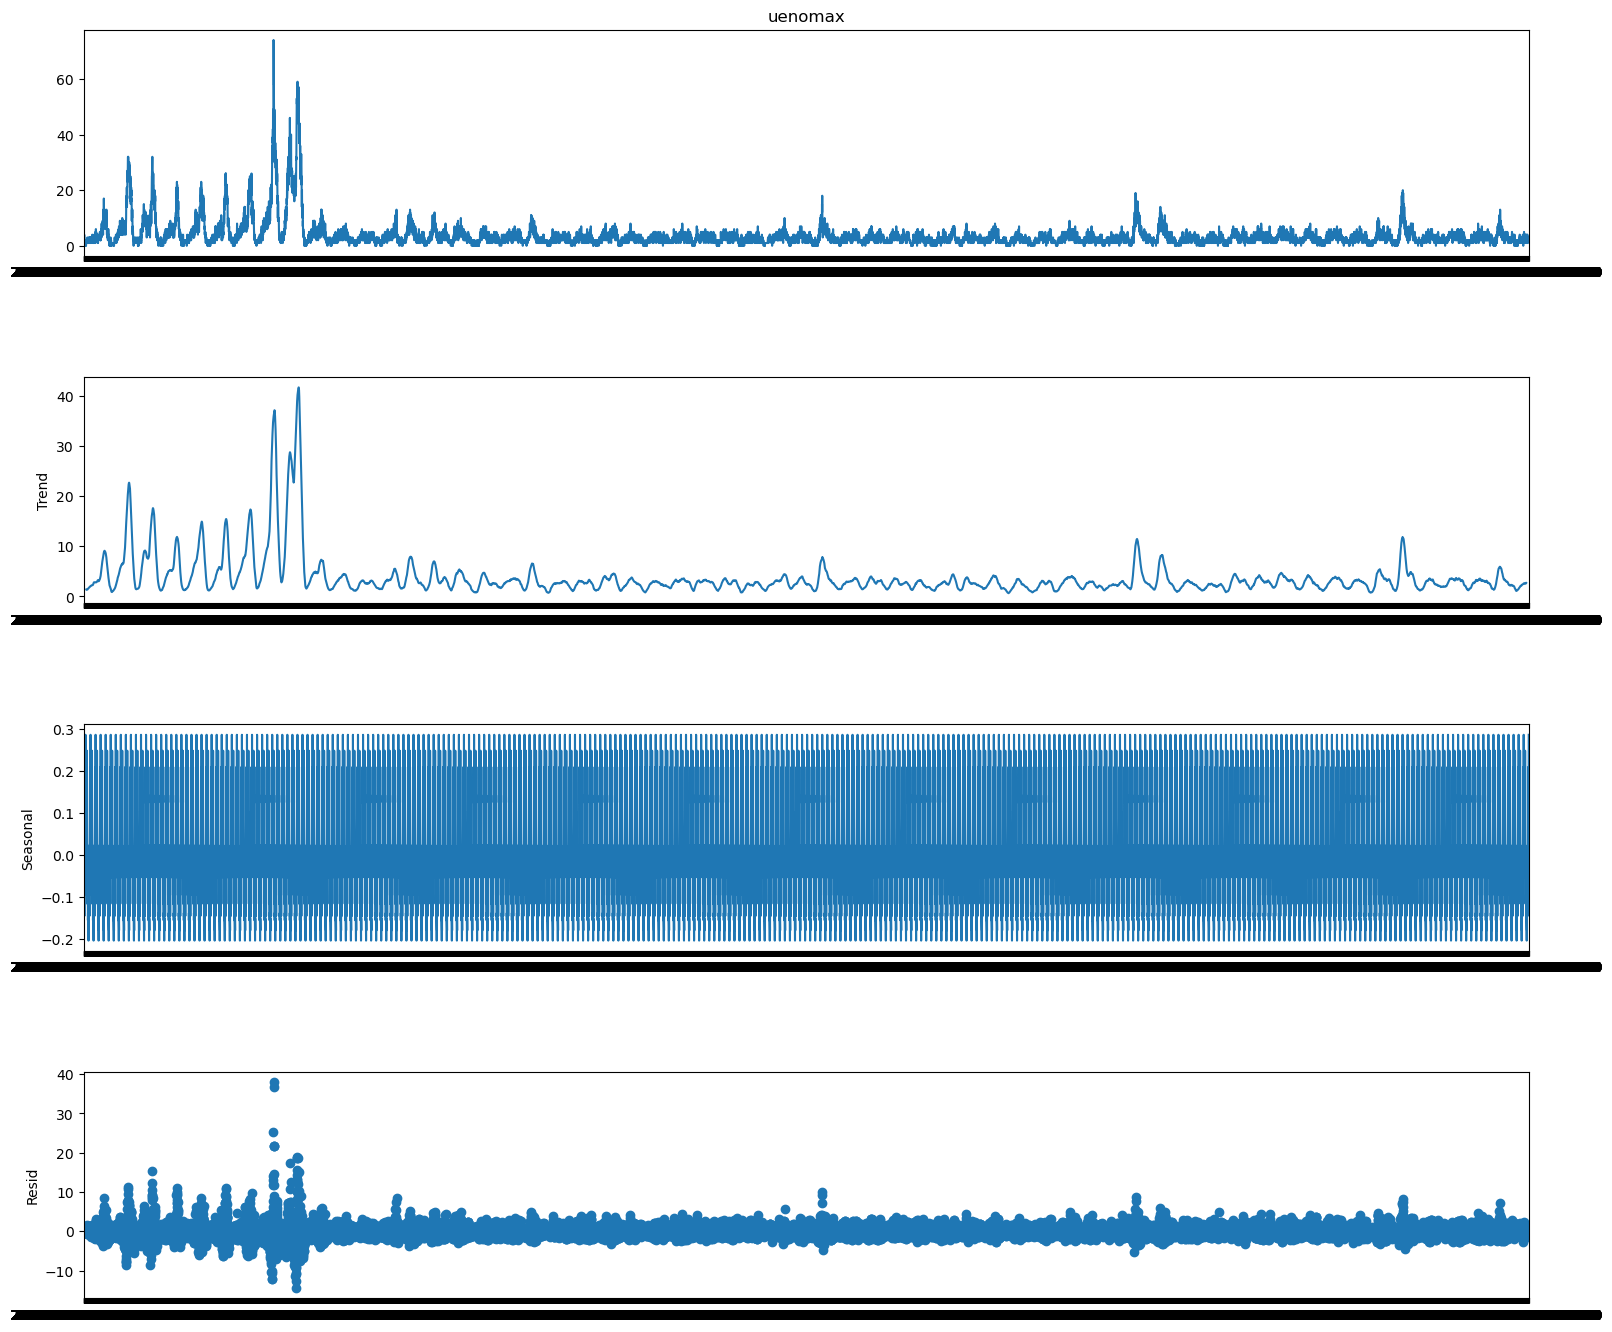

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
result =seasonal_decompose(ts['uenomax'], model ='additive', period = 60)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,15)

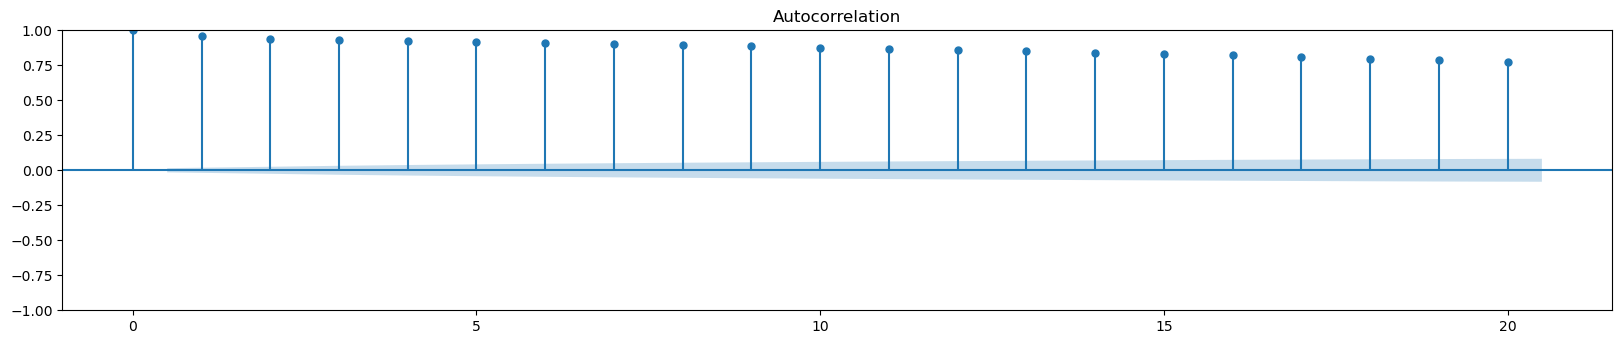

In [61]:
import statsmodels.api as sm
fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts, lags = 20, ax = ax1)

* 정상성을 만족

In [63]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ts)
print('p-value: %f' % result[1])

p-value: 0.000000


In [64]:
ts_diff = ts - ts.shift()

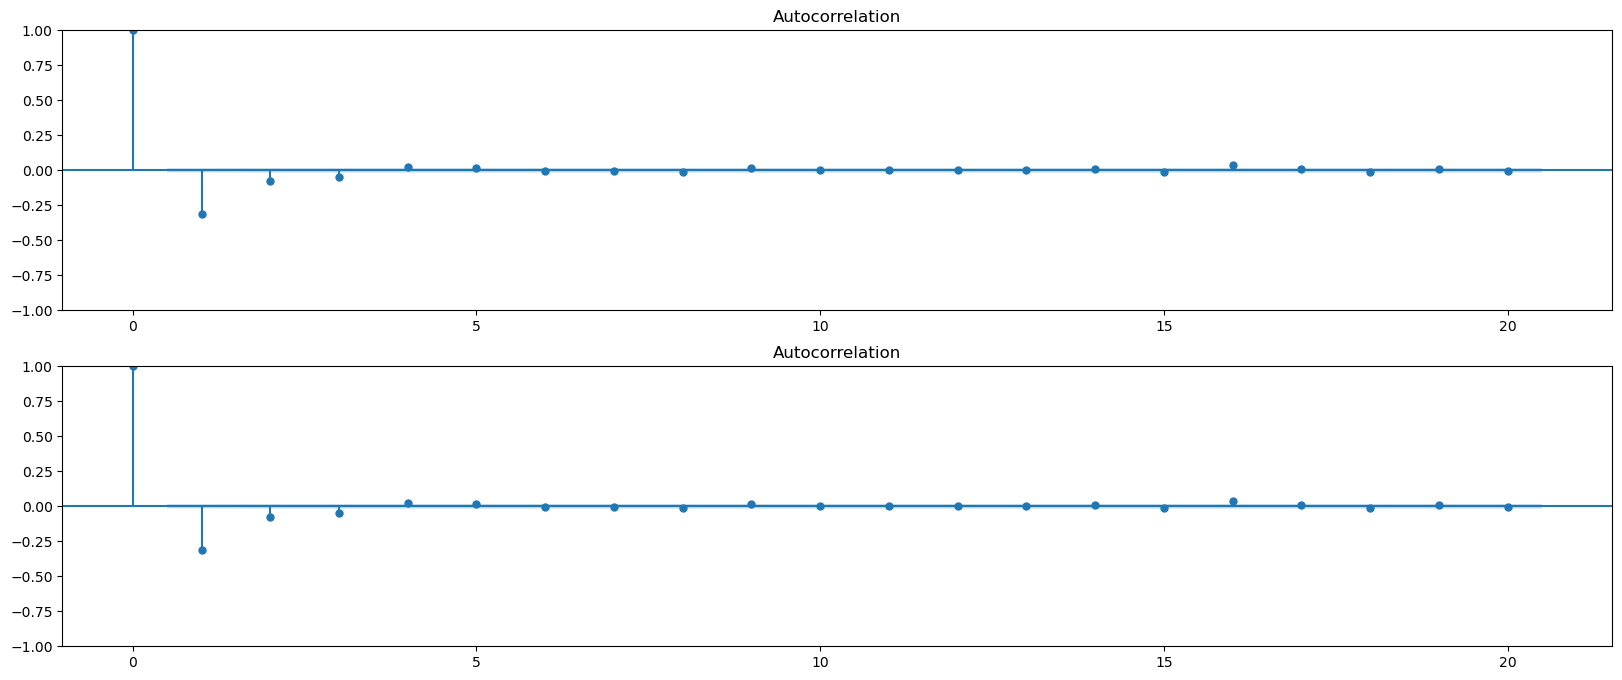

In [67]:
import statsmodels.api as sm

fig = plt.figure(figsize = (20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags =20, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_acf(ts_diff[1:], lags =20, ax = ax2)

In [71]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import datetime

model = ARIMA(ts, order = (2,1,2))
model_fit = model.fit()

C:\Users\dydwl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dydwl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dydwl\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [76]:
ts

,uenomax
datetime,
2023-05-19 00:00:00,1
2023-05-19 00:05:00,2
2023-05-19 00:10:00,3
2023-05-19 00:15:00,2
2023-05-19 00:20:00,2
...,...
2023-07-17 15:30:00,3
2023-07-17 15:35:00,3
2023-07-17 15:40:00,3


In [77]:
start_index = '2023-05-19 00:00:00'
end_index = '2023-07-17 15:50:00'

forecast = model_fit.predict(start=start_index, end=end_index, typ='levels')

In [82]:
forecast.head()

datetime
2023-05-19 00:00:00    0.000000
2023-05-19 00:05:00    0.999999
2023-05-19 00:10:00    1.681086
2023-05-19 00:15:00    2.425235
2023-05-19 00:20:00    2.043629
Name: predicted_mean, dtype: float64

In [80]:
submission_data = pd.read_csv("./files/Q1_label_sample.csv")

In [85]:
submission_data['BaseStationB'] = forecast.values
submission_data['BaseStationJ'] = forecast.values

In [87]:
submission_data.to_csv('result.csv')

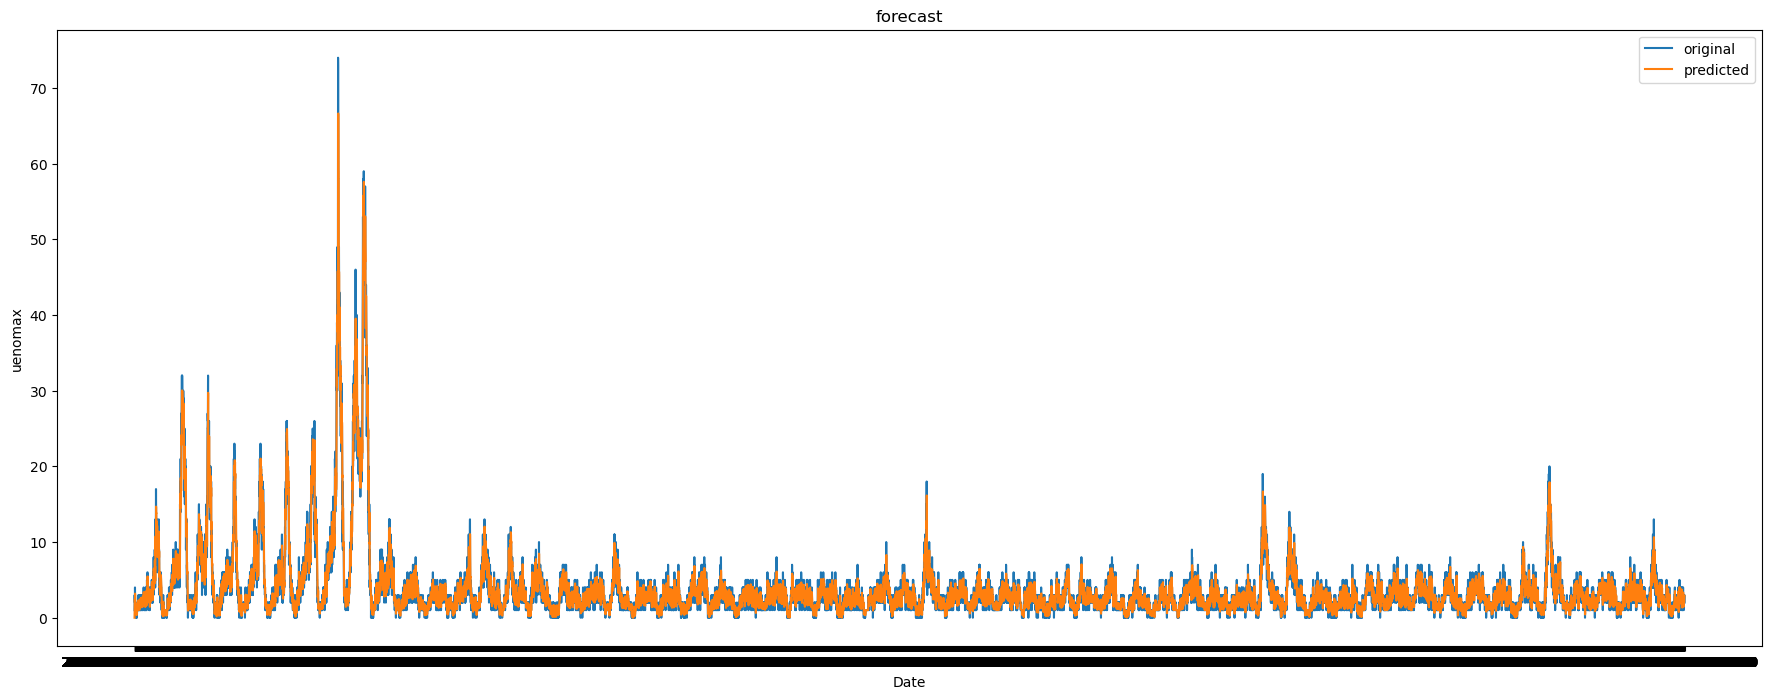

In [89]:
plt.figure(figsize = (22,8))
plt.plot(basestation_id.datetime, basestation_id.uenomax, label = 'original')
plt.plot(forecast, label = 'predicted')
plt.title('forecast')
plt.xlabel('Date')
plt.ylabel('uenomax')
plt.legend()
plt.show()